Modules Needed

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

Cleaning and Preprocessing

In [330]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [331]:
raw_data = pd.read_csv('train.csv')

In [332]:
data = raw_data.copy()

In [333]:
###Missing Values

In [334]:
data.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,N

In [335]:
data = data.drop('Id', axis = 1)

In [336]:
missing_values = data.isnull().sum()

In [337]:
missing_values=pd.DataFrame(data = missing_values)

In [338]:
missing_values

,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0
LotConfig,0


In [339]:
columns_to_drop = ['Alley','MasVnrType', 'FireplaceQu', 'PoolQC','Fence','MiscFeature']


In [534]:
data_no_na = data.drop(columns_to_drop, axis = 1)

In [535]:
data_with_na = pd.DataFrame(data = data_no_na.isnull().sum())

In [536]:
data_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Imputing missing values with median

In [587]:
from sklearn.impute import SimpleImputer
imputer_cat = SimpleImputer(strategy = 'most_frequent')
imputer_num = SimpleImputer(strategy = 'median')

In [583]:
columns_with_missing_values = []
for column in data_no_na:
    if data_no_na[column].isnull().any():  # Check if any value in the column is missing
        columns_with_missing_values.append(column)

In [584]:
columns_with_missing_values

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [585]:
data_impute = data_no_na.copy()
for col in data_no_na:
    data_no_na[col] = data_impute[col].astype('category')

In [581]:
cat_data_cols = []
for col in data_impute.iloc[:,:-1].columns:
    if data_impute[col].dtypes == 'object' : ##or data_impute[col].dtype.name == 'category':
        cat_data_cols.append(col)

In [589]:
data_impute[cat_data_cols] = imputer_cat.fit_transform(data_impute[cat_data_cols])

In [597]:
data_impute.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1201 non-null   category
 3   LotArea        1460 non-null   category
 4   Street         1460 non-null   object  
 5   LotShape       1460 non-null   object  
 6   LandContour    1460 non-null   object  
 7   Utilities      1460 non-null   object  
 8   LotConfig      1460 non-null   object  
 9   LandSlope      1460 non-null   object  
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   category
 16  OverallCond    1460 non-null   category
 17  YearBuilt      1460 non-null   ca

In [598]:
num_data_cols = []
for col in data_impute.iloc[:,:-1].columns:
    if data_impute[col].dtypes == 'category': ##or data_impute[col].dtype.name == 'category':
        num_data_cols.append(col)

In [599]:
num_data_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [600]:
data_impute[num_data_cols] = imputer_num.fit_transform(data_impute[num_data_cols])

Text(0.5, 1.0, 'Correlation Matrix')

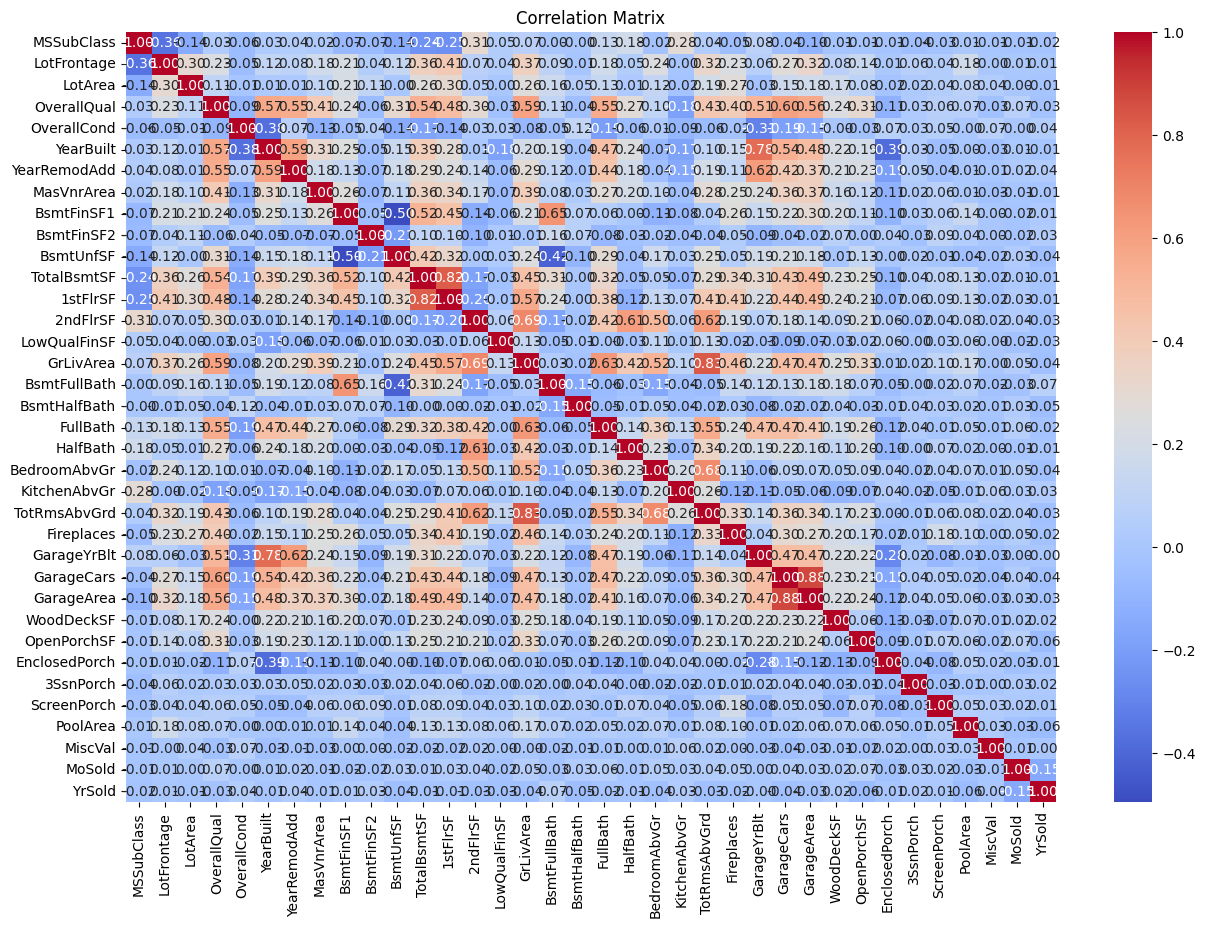

In [601]:
correlation_matrix = data_impute[num_data_cols].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

In [602]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [603]:
data_impute[num_data_cols] = scaler.fit_transform(data_impute[num_data_cols])

In [604]:
data_impute.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.073375,RL,-0.220875,-0.207142,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651479,-0.517200,1.050994,0.878668,Gable,CompShg,VinylSd,VinylSd,0.514104,Gd,TA,PConc,Gd,TA,No,GLQ,0.575425,Unf,-0.288653,-0.944591,-0.459303,GasA,Ex,Y,SBrkr,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,Gd,0.912210,Typ,-0.951226,Attchd,1.017598,RFn,0.311725,0.351000,TA,TA,Y,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,WD,Normal,208500
1,-0.872563,RL,0.460320,-0.091886,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,-0.071836,2.179628,0.156734,-0.429577,Gable,CompShg,MetalSd,MetalSd,-0.570750,TA,TA,CBlock,Gd,TA,Gd,ALQ,1.171992,Unf,-0.288653,-0.641228,0.466465,GasA,Ex,Y,SBrkr,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,TA,-0.318683,Typ,0.600495,Attchd,-0.107927,RFn,0.311725,-0.060731,TA,TA,Y,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,WD,Normal,181500
2,0.073375,RL,-0.084636,0.073480,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651479,-0.517200,0.984752,0.830215,Gable,CompShg,VinylSd,VinylSd,0.325915,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.092907,Unf,-0.288653,-0.301643,-0.313369,GasA,Ex,Y,SBrkr,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,Gd,-0.318683,Typ,0.600495,Attchd,0.934226,RFn,0.311725,0.631726,TA,TA,Y,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,WD,Normal,223500
3,0.309859,RL,-0.447940,-0.096897,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.651479,-0.517200,-1.863632,-0.720298,Gable,CompShg,Wd Sdng,Wd Shng,-0.570750,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.499274,Unf,-0.288653,-0.061670,-0.687324,GasA,Gd,Y,SBrkr,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,Gd,0.296763,Typ,0.600495,Detchd,0.809167,Unf,1.650307,0.790804,TA,TA,Y,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,WD,Abnorml,140000
4,0.073375,RL,0.641972,0.375148,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,1.374795,-0.517200,0.951632,0.733308,Gable,CompShg,VinylSd,VinylSd,1.366489,Gd,TA,PConc,Gd,TA,Av,GLQ,0.463568,Unf,-0.288653,-0.174865,0.199680,GasA,Ex,Y,SBrkr,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,Gd,1.527656,Typ,0.600495,Attchd,0.892540,RFn,1.650307,1.698485,TA,TA,Y,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,WD,Normal,250000


Using Binary Encoder to encode categorical variable

In [605]:
import category_encoders as ce
binary_enc = ce.BinaryEncoder(cols=cat_data_cols)
encoded_data = binary_enc.fit_transform(data_impute)

In [606]:
data_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   float64 
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   float64 
 4   Street         1460 non-null   object  
 5   LotShape       1460 non-null   object  
 6   LandContour    1460 non-null   object  
 7   Utilities      1460 non-null   object  
 8   LotConfig      1460 non-null   object  
 9   LandSlope      1460 non-null   object  
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   float64 
 16  OverallCond    1460 non-null   float64 
 17  YearBuilt      1460 non-null   fl

Dimensionality Regression

In [607]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)

In [608]:
X = encoded_data.iloc[:,:-1]
y = encoded_data.iloc[:,-1]

In [609]:
X_pca = pca.fit_transform(X)

Train_Test_Split

In [667]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain,Ytest = train_test_split(X_pca,y, test_size =0.2, random_state =102)

Model

In [668]:
###Tried a couple of models including MLPRegressor, LinearRegressor and Gradient Boosting
###Random Forest Worked best in this case

In [695]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
model_1= RandomForestRegressor(n_estimators=150, random_state=102)
scores = cross_val_score(model_1, Xtrain, Ytrain, cv=10, scoring='r2')
model_1.fit(Xtrain, Ytrain)

RandomForestRegressor(n_estimators=150, random_state=102)

In [696]:
scores.mean()

0.8563507455027415

In [697]:
ypred_model1 = model_1.predict(Xtrain)

In [698]:
mse1 = mean_squared_error(Ytrain, ypred_model1)
mae1 = mean_absolute_error(Ytrain, ypred_model1)

In [699]:
mse1, mae1

(116697808.72165559, 6562.837460045662)

In [700]:
def adj_R2(r2score_model):
    n= len(y)
    p = X.shape[1]
    return 1 - ( 1-r2score_model1) * (n - 1) / (n - p - 1 )
    

In [701]:
r2score_model1 = r2_score(Ytrain, ypred_model1)
r2score_model1

0.9816616213314796

In [702]:
adjR2_model1 = adj_R2(r2score_model1)
adjR2_model1

0.9795445760876367

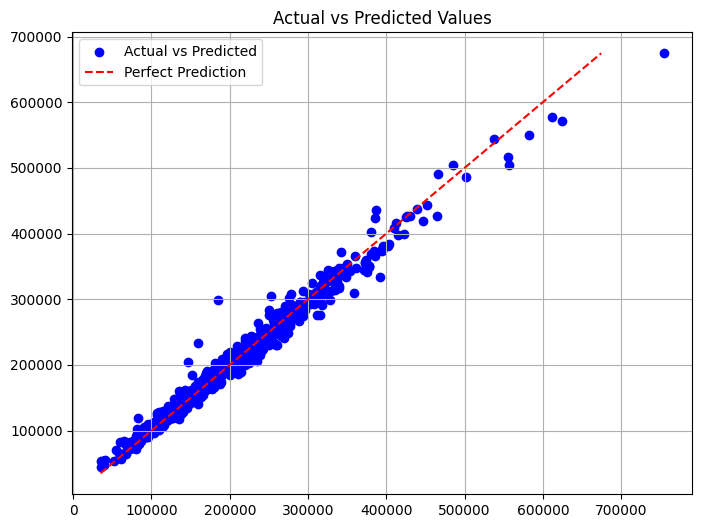

In [703]:
plt.figure(figsize=(8, 6))
plt.scatter(Ytrain, ypred_model1, color='blue', label='Actual vs Predicted')
plt.plot([min(Ytrain), max(ypred_model1)], [min(Ytrain), max(ypred_model1)], '--', color='red', label='Perfect Prediction')

plt.title('Actual vs Predicted Values')
###plt.xlabel('Actual values (y_train)')
###plt.ylabel('Predicted values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()


Test_prediction

In [704]:
test_pred= model_1.predict(Xtest)

In [705]:
mae_test, mse_test =  mean_absolute_error(Ytest, test_pred),mean_squared_error(Ytest, test_pred)
mae_test, mse_test

(17894.46643835616, 1170868423.516379)

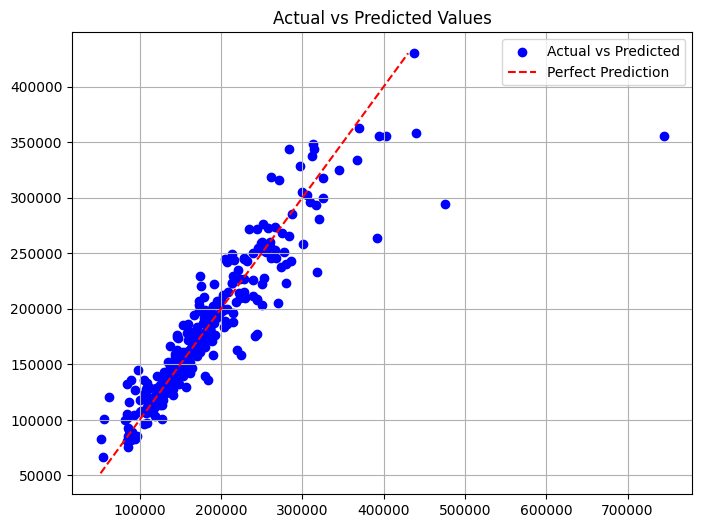

In [706]:
plt.figure(figsize=(8, 6))
plt.scatter(Ytest, test_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(Ytest), max(test_pred)], [min(Ytest), max(test_pred)], '--', color='red', label='Perfect Prediction')

plt.title('Actual vs Predicted Values')
###plt.xlabel('Actual values y_train', colour = 'blue')
###plt.ylabel('Predicted values y_pred')
plt.legend()
plt.grid(True)
plt.show()


In [681]:
import pickle

# Saving the model
with open('Housing Analysis.pkl', 'wb') as file:
    pickle.dump(model_1, file)